In [17]:
#step 1 : import libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#load the data 
df = pd.read_csv(r"C:\Users\payaswini\Downloads\netflix_titles.csv\netflix_titles.csv")

In [29]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [31]:
#clean data
df=df.dropna(subset=['type','release_year','rating','country','duration'])

In [48]:
type_counts=df['type'].value_counts()
type_counts

type
Movie      4066
TV Show    1686
Name: count, dtype: int64

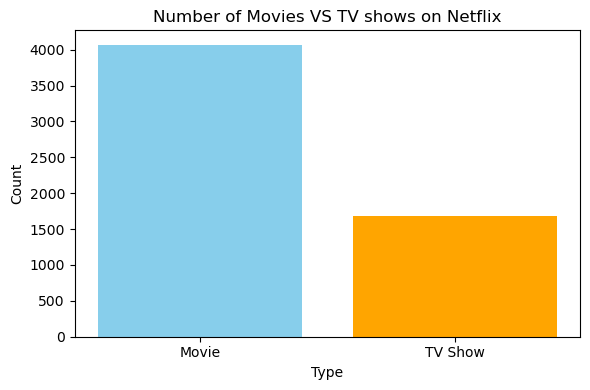

In [44]:
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title("Number of Movies VS TV shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")
plt.show()


In [50]:
rating_counts=df["rating"].value_counts()
rating_counts

rating
TV-MA       1892
TV-14       1544
TV-PG        637
R            507
PG-13        282
NR           217
PG           182
TV-G         134
TV-Y7        126
TV-Y         105
TV-Y7-FV      82
G             35
UR             7
NC-17          2
Name: count, dtype: int64

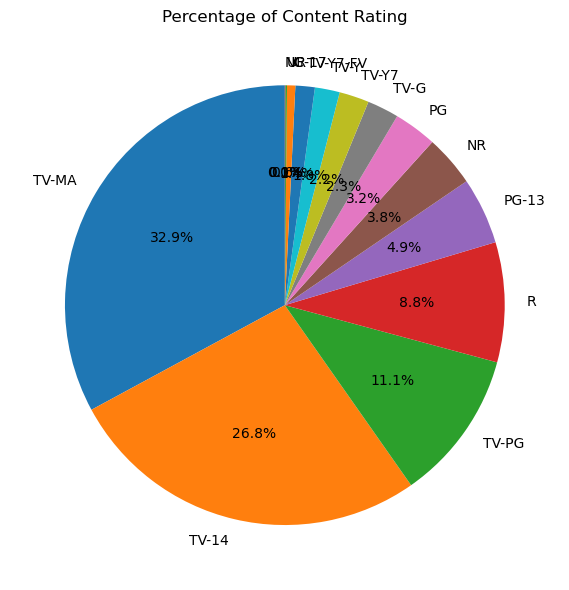

In [62]:
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index ,autopct="%1.1f%%" ,startangle=90)
plt.title("Percentage of Content Rating")
plt.tight_layout()
plt.savefig('content_Ratings_pie.png')
plt.show()


In [64]:
movie_df=df[df['type']=="Movie"].copy()

In [66]:
movie_df["duration_int"] = movie_df['duration'].str.replace('min','').astype(int)

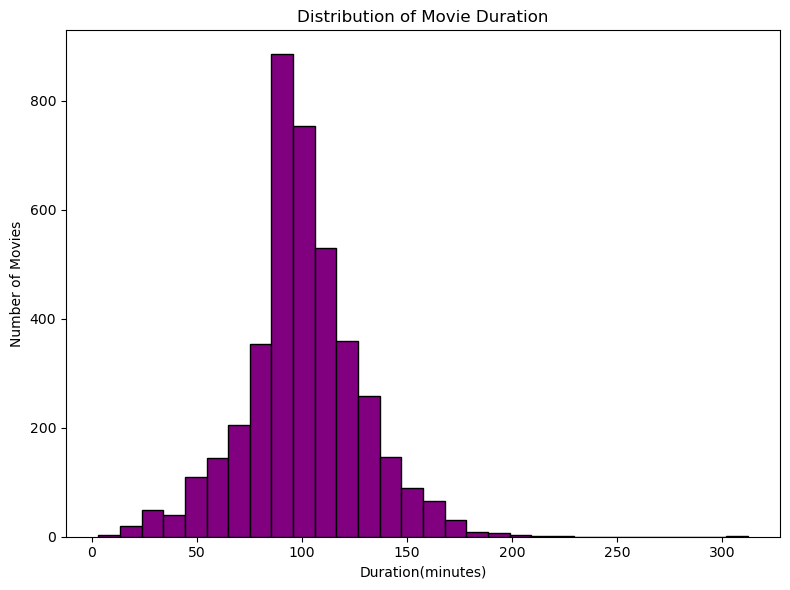

In [76]:
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel("Duration(minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig("movie_duration_histogram.png")
plt.show()

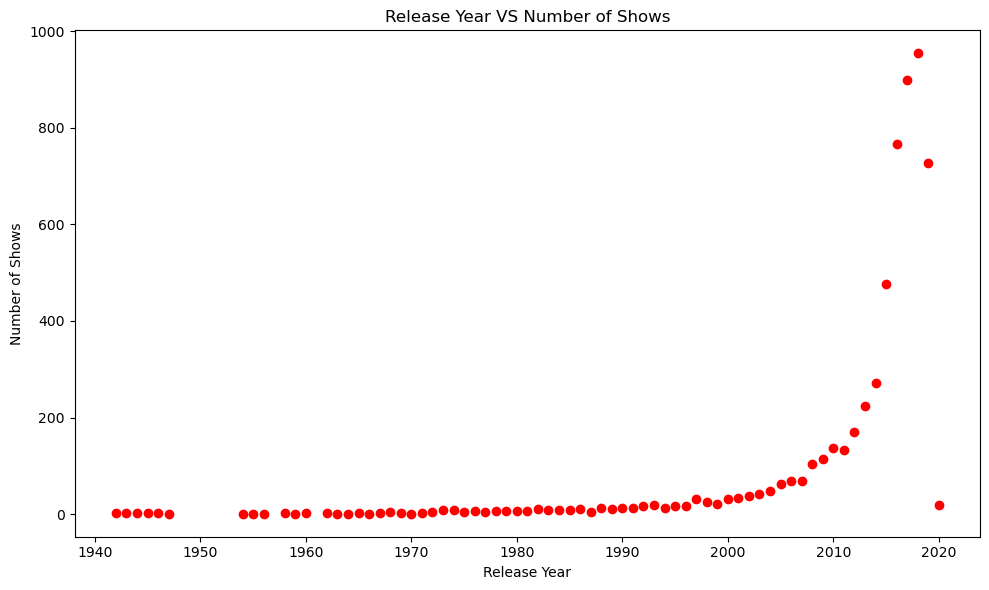

In [79]:
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color="red")
plt.title('Release Year VS Number of Shows')
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()

In [83]:
country_counts=df['country'].value_counts().head(10)

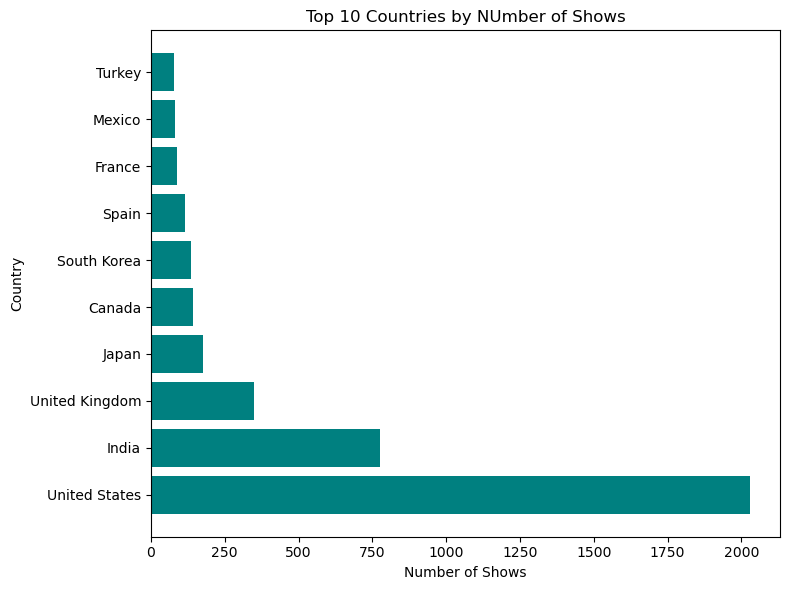

In [101]:
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 Countries by NUmber of Shows')
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top10_countries.png")
plt.show()


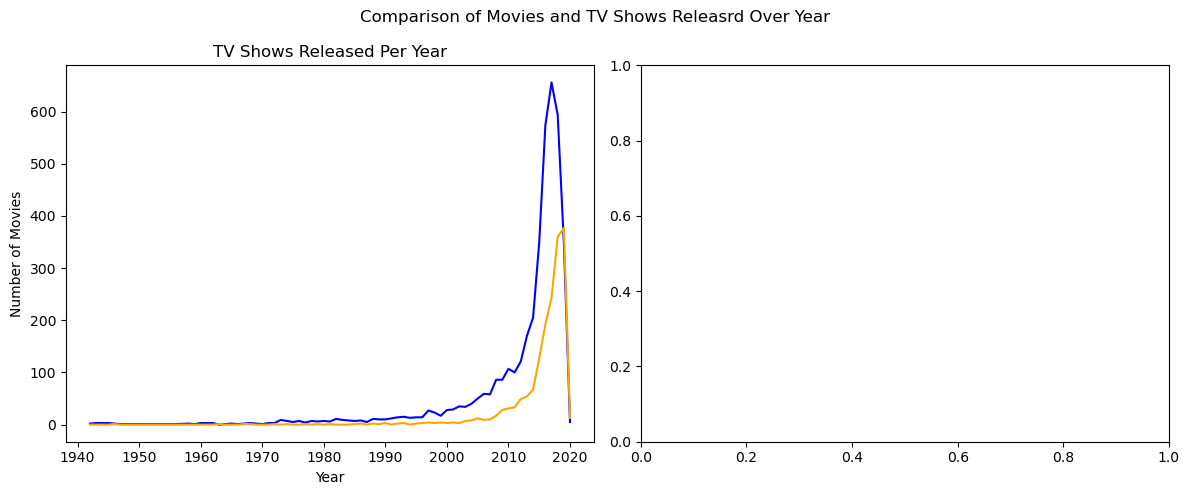

In [99]:
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax =plt.subplots(1,2,figsize=(12,5))

#first subplot
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movie Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot
ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[0].set_title('TV Shows Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

fig.suptitle('Comparison of Movies and TV Shows Releasrd Over Year')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()


In [ ]:
y